## 1. AL-System 

In [16]:
import al
import sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Make Classification Dataset 

In [18]:
X,y = sklearn.datasets.make_classification()
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.019669,-0.063030,-0.052517,0.010900,0.145553,0.057671,0.167320,0.027398,0.109753,-0.036703,-0.043479,0.043161,-0.066893,0.161527,0.125208,0.046104,0.043121,0.061760,0.024319,-0.050430
std,0.548439,1.031657,1.086519,0.809235,0.982692,0.962405,1.047471,1.016110,1.027299,0.889734,1.051058,1.121990,1.152499,1.117404,1.027375,1.072008,1.004149,0.850117,0.906515,1.289375
min,-1.097352,-2.637694,-2.730716,-1.649517,-2.217072,-2.379529,-2.294740,-2.238622,-2.791607,-1.934075,-2.841075,-2.281987,-2.996131,-2.216374,-2.736375,-2.168013,-1.926245,-1.900551,-2.090418,-2.805710
25%,-0.439419,-0.731022,-0.757835,-0.396961,-0.645459,-0.455477,-0.668656,-0.678929,-0.628753,-0.629692,-0.719648,-0.731883,-0.948299,-0.471827,-0.593056,-0.893684,-0.599710,-0.588434,-0.479685,-0.955998
50%,0.001286,-0.116842,-0.060035,-0.127304,-0.025107,0.005846,0.212883,0.050329,0.037104,-0.015137,-0.170303,-0.108234,-0.117045,0.118482,0.122167,0.268084,-0.096013,0.079818,-0.053752,0.223469
75%,0.506940,0.541673,0.573267,0.790728,0.850146,0.614788,0.761236,0.694383,0.719679,0.547812,0.555865,1.043601,0.923635,0.752039,0.840930,0.876972,0.693214,0.620952,0.627306,1.105004
max,0.947210,2.836841,2.983777,1.406860,2.853800,3.352464,3.439609,2.475389,2.913049,1.886065,2.567196,2.315653,2.246559,3.384456,2.597316,1.738117,3.451186,2.222208,2.133968,2.556843


In [3]:
print(len(X))

100


In [4]:
m = al.AL()
m.fit(X, y)
progs = m.get_programs()

Generating transforms
Programs of depth=0
[Transforms] Pruning programs of depth 0
Programs of depth=1
Failed computing missing
[Transforms] Pruning programs of depth 1
Programs of depth=2
[Transforms] Pruning programs of depth 2
Generating modeling
Failed computing missing
[Model] Pruning programs of depth 0
[Model] Pruning programs of depth 1
[Model] Pruning programs of depth 2
[Model] Pruning programs of depth 3
Adding test data
Fitting programs found on entire training set


  0%|          | 0/26 [00:00<?, ?it/s]Failed to apply transform(builtins.module): None
Failed to apply transform(builtins.module): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(sklearn.feature_extraction.dict_vectorizer.DictVectorizer): None
Failed to apply transform(sklearn.feature_extraction.dict_vectorizer.DictVectorizer): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(sklearn.pipeline.Pipeline): None
Failed to apply transform(sklearn.pipeline.Pipeline): <class 'synthesis.runtime_helpers.ColumnLoop'>

 15%|█▌        | 4/26 [00:00<00:00, 32.99it/s]Failed to apply transform(sklearn.feature_extraction.text.CountVectorizer): None
Failed to apply transform(sklearn.feature_extraction.text.CountVectorizer): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(sklearn.ensemble.forest.RandomForestRegressor): None
Failed to apply transform(sklearn.ensemble.forest.RandomForestRegressor): <class 'synthesis.runtime_helpers.

In [5]:
print("Number of Programs:", len(progs))

Number of Programs: 31


In [6]:
dir(progs[0])

['__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_model',
 'add_test_data',
 'add_transform',
 'code',
 'copy_with_sharing',
 'depth',
 'fit_final',
 'imports',
 'imports_code',
 'instr_id',
 'log_prob',
 'model_',
 'ops',
 'pipeline_code',
 'predict',
 'predict_proba',
 'score',
 'score_',
 'state',
 'trace']

In [7]:
print("Score:", progs[0].score_)
print("Depth:", progs[0].depth)

Score: 1.0
Depth: 0


In [8]:
print(progs[0].pipeline_code())

import sklearn.ensemble.forest
import sklearn
import xgboost

from sklearn.pipeline import Pipeline
p = Pipeline([('model', sklearn.ensemble.forest.ExtraTreesClassifier())])
p.fit(X_train, y_train)
print(p.score(X_val, y_val))
p.fit(X, y)
def predict(X_test): return p.predict(X_test)


In [9]:
print("Score:", progs[-10].score_)
print("Depth:", progs[-10].depth)


Score: 0.880952380952
Depth: 3


In [10]:
print(progs[-10].pipeline_code())

import sklearn.preprocessing.imputation
import sklearn.preprocessing.data
import sklearn.decomposition.truncated_svd
import xgboost
import sklearn.svm.classes
import sklearn

from sklearn.pipeline import Pipeline
p = Pipeline([('t0', sklearn.preprocessing.data.StandardScaler()),('t1', runtime_helpers.ColumnLoop(sklearn.preprocessing.imputation.Imputer)),('t2', sklearn.decomposition.truncated_svd.TruncatedSVD()),('model', sklearn.svm.classes.LinearSVC())])
p.fit(X_train, y_train)
print(p.score(X_val, y_val))
p.fit(X, y)
def predict(X_test): return p.predict(X_test)


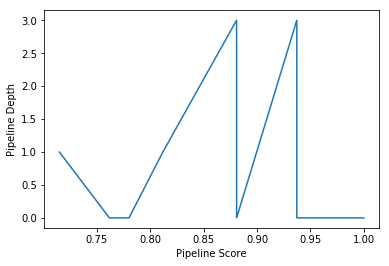

In [11]:
scores = [i.score_ for i in progs]
depths = [i.depth for i in progs]
plt.plot(scores, depths)
plt.xlabel('Pipeline Score')
plt.ylabel('Pipeline Depth')
plt.show()

### Boston Housing Dataset


In [12]:
X, y = sklearn.datasets.load_boston(return_X_y=True)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
print(len(X))

506


In [14]:
m.fit(X, y)
progs_boston = m.get_programs()

  0%|          | 0/26 [00:00<?, ?it/s]Failed to apply transform(sklearn.pipeline.Pipeline): None
Failed to apply transform(sklearn.pipeline.Pipeline): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(builtins.module): None
Failed to apply transform(builtins.module): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(sklearn.feature_extraction.dict_vectorizer.DictVectorizer): None
Failed to apply transform(sklearn.feature_extraction.dict_vectorizer.DictVectorizer): <class 'synthesis.runtime_helpers.ColumnLoop'>
Failed to apply transform(sklearn.feature_extraction.text.CountVectorizer): None
Failed to apply transform(sklearn.feature_extraction.text.CountVectorizer): <class 'synthesis.runtime_helpers.ColumnLoop'>

 19%|█▉        | 5/26 [00:00<00:00, 38.98it/s]Failed to apply transform(sklearn.ensemble.forest.RandomForestRegressor): None
Failed to apply transform(sklearn.ensemble.forest.RandomForestRegressor): <class 'synthesis.runtime_helpers.

Generating transforms
Programs of depth=0
[Transforms] Pruning programs of depth 0
Programs of depth=1
Failed computing missing
[Transforms] Pruning programs of depth 1
Programs of depth=2
[Transforms] Pruning programs of depth 2
Generating modeling
Failed computing missing
[Model] Pruning programs of depth 0
[Model] Pruning programs of depth 1
[Model] Pruning programs of depth 2
[Model] Pruning programs of depth 3
Adding test data
Fitting programs found on entire training set


In [15]:
len(progs_boston)

0